# Task 2.1



## Analysis of percentage turnout of marketing campaign



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
campaign = pd.read_csv("Customer_campaign_details_p1.csv")
campaign.tail()

,Customer_id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
37079,37080,cellular,nov,fri,334,1,999,0,nonexistent
37080,37081,cellular,nov,fri,383,1,999,0,nonexistent
37081,37082,cellular,nov,fri,189,2,999,0,nonexistent
37082,37083,cellular,nov,fri,442,1,999,0,nonexistent
37083,37084,cellular,nov,fri,239,3,999,1,failure


In [24]:
target = pd.read_csv("Customer_Response_data_P1.csv")
target.head()

,Customer_id,y
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [5]:
campaign_outcome = pd.merge(campaign, target, on='Customer_id', how='inner')
campaign_outcome.tail()

,Customer_id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
37079,37080,cellular,nov,fri,334,1,999,0,nonexistent,yes
37080,37081,cellular,nov,fri,383,1,999,0,nonexistent,no
37081,37082,cellular,nov,fri,189,2,999,0,nonexistent,no
37082,37083,cellular,nov,fri,442,1,999,0,nonexistent,yes
37083,37084,cellular,nov,fri,239,3,999,1,failure,no


(array([32876.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4208.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

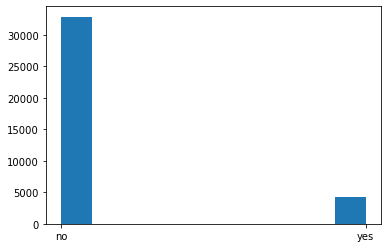

In [6]:
plt.hist(campaign_outcome['y'])

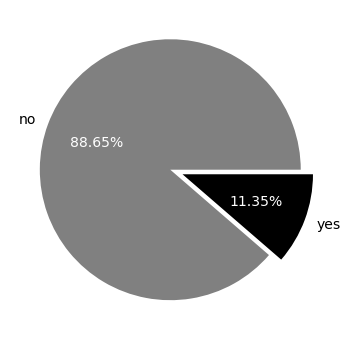

In [7]:
plt.figure(figsize=(10,6))
_, _, pie = plt.pie(campaign_outcome['y'].value_counts(), explode=[0,0.1], labels=campaign_outcome['y'].unique(), 
                    autopct='%.2f%%', colors=['grey','black'], textprops={'fontsize': 14})
for p in pie:
    p.set_color('white')

### The percentage turnout for Campaigns is:  11.35 %

____________________________________

## Demographic analysis of the marketing campaign using the master files

In [8]:
custDetails = pd.read_csv("Customer_and_bank details_p1.csv")
target = pd.read_csv("Customer_Response_data_P1.csv")
state = pd.read_csv("State_Master.csv")
region = pd.read_csv("Region_code_master.csv")
region['Region_Code'] = region['Region_Code'].astype(str)
state.drop('Region_Code', axis=1, inplace=True)
cust_outcome = pd.merge(custDetails, target, on='Customer_id', how='inner')
cust_outcome = pd.merge(cust_outcome, state, on='State_Code', how='inner')
cust_outcome = pd.merge(cust_outcome, region, on='Region_Code', how='inner')
cust_outcome.reset_index(drop=True, inplace=True)
cust_outcome.tail()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,y,State_Name,Region_Name
37019,19481,31,admin.,single,university.degree,no,yes,no,2,S49,C321,yes,West Virginia,East
37020,27883,32,admin.,single,university.degree,no,yes,no,2,S49,C321,no,West Virginia,East
37021,27884,44,management,married,university.degree,no,yes,no,2,S49,C321,no,West Virginia,East
37022,27885,34,services,unknown,high.school,no,yes,yes,2,S49,C321,no,West Virginia,East
37023,29475,52,blue-collar,married,basic.9y,unknown,yes,no,2,S49,C321,no,West Virginia,East


#### State-wise analysis

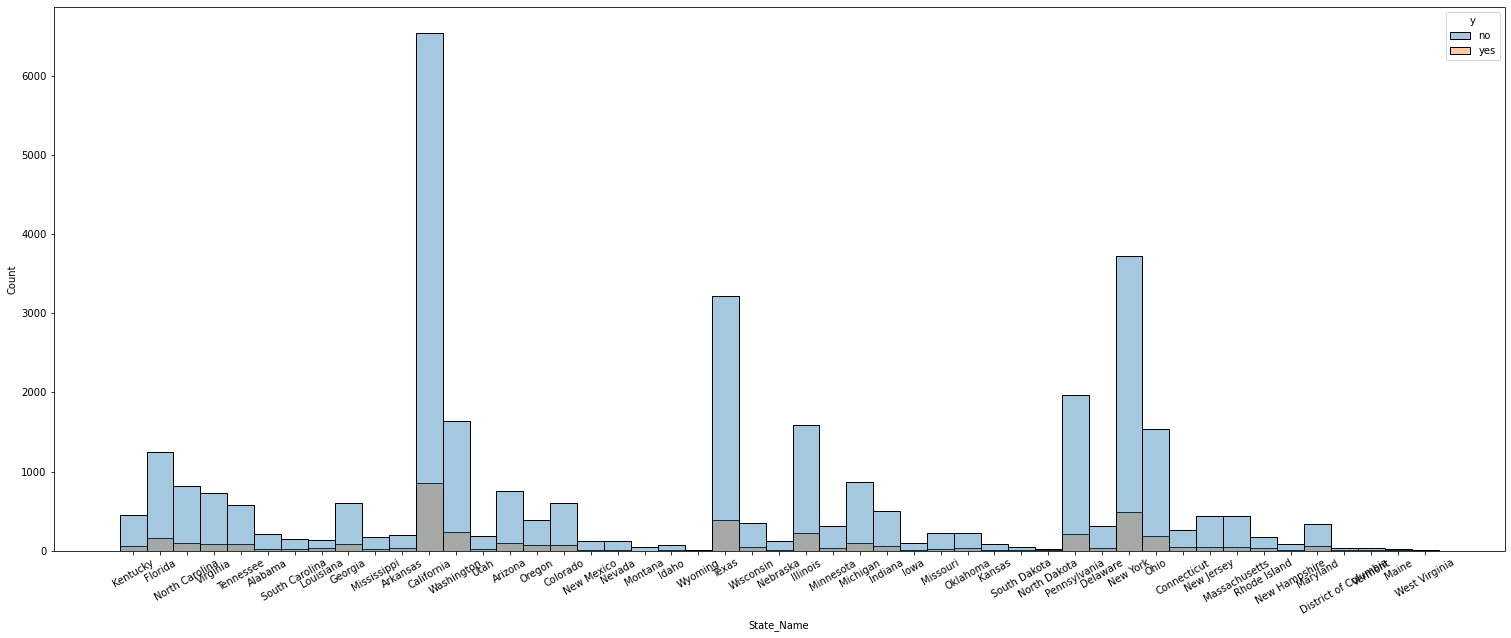

In [9]:
plt.figure(figsize=(26,10))
ax = sns.histplot(x='State_Name', hue='y', data=cust_outcome, alpha=0.4)
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
plt.show()

In [10]:
analysis_state = pd.pivot_table(cust_outcome, index =['State_Name'],values=['Customer_id'], columns=['y'], aggfunc='count',margins=True, margins_name='Total')
analysis_state["Percentage"] = analysis_state['Customer_id']['yes']/analysis_state['Customer_id']['Total']*100
analysis_state.sort_values(by='Percentage',ascending=False).head()

Customer_id           Percentage
y                       no yes Total           
State_Name                                     
Wyoming                  3   1     4  25.000000
Louisiana              132  30   162  18.518519
Oregon                 388  72   460  15.652174
South Carolina         142  26   168  15.476190
North Dakota            22   4    26  15.384615

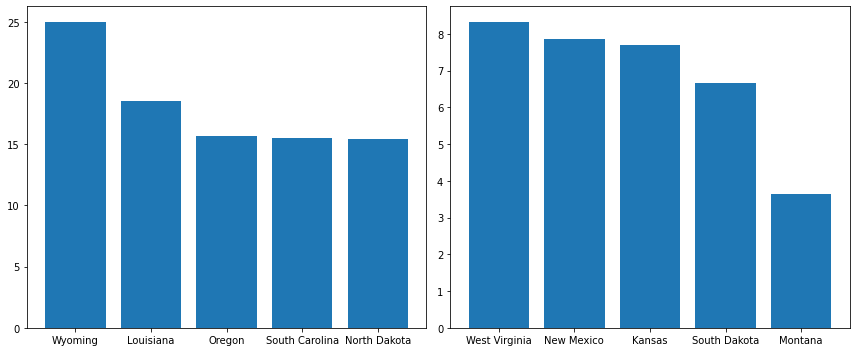

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.bar(analysis_state.sort_values(by='Percentage',ascending=False).index[:5], 
        analysis_state.sort_values(by='Percentage',ascending=False)['Percentage'][:5])
plt.subplot(1, 2, 2)
plt.bar(analysis_state.sort_values(by='Percentage',ascending=False).index[-5:], 
        analysis_state.sort_values(by='Percentage',ascending=False)['Percentage'][-5:])
plt.tight_layout()


#### INFERENCE- We have observed that the state-wise success percentage is highest in Wyoming at 25% and lowest in Montana at 3.6%.

 
 
#### Region-wise analysis

In [12]:
analysis_region = pd.pivot_table(cust_outcome, index =['Region_Name'],values=['Customer_id'], columns=['y'], aggfunc='count',margins=True, margins_name='Total')
analysis_region["Percentage"] = analysis_region['Customer_id']['yes']/analysis_region['Customer_id']['Total']*100
analysis_region.sort_values(by='Percentage',ascending=False)

Customer_id              Percentage
y                    no   yes  Total           
Region_Name                                    
West              10491  1393  11884  11.721643
South              5292   700   5992  11.682243
Total             32824  4200  37024  11.343993
East               9390  1168  10558  11.062701
Central            7651   939   8590  10.931315

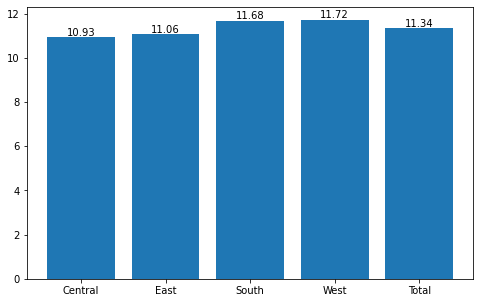

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(analysis_region.index, analysis_region['Percentage'])
for bar in bars:
    height = bar.get_height().round(2)
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f'{height}', ha='center',
    va='bottom')

#### INFERENCE- We have observed that the regional percentage is almost the same as average percentage for the success rate of the campaign. There is no data of North so we can target the North region

#### Job-wise analysis

In [14]:
analysis_job = pd.pivot_table(cust_outcome, index =['job'],values=['Customer_id'], columns=['y'], aggfunc='count',margins=True, margins_name='Total')
analysis_job["Percentage"] = analysis_job['Customer_id']['yes']/analysis_job['Customer_id']['Total']*100
analysis_job.sort_values(by='Percentage',ascending=False)

Customer_id              Percentage
y                      no   yes  Total           
job                                              
student               527   240    767  31.290743
retired              1144   395   1539  25.666017
unemployed            791   134    925  14.486486
admin.               8163  1240   9403  13.187281
unknown               271    35    306  11.437908
Total               32824  4200  37024  11.343993
management           2343   292   2635  11.081594
technician           5430   657   6087  10.793494
self-employed        1144   130   1274  10.204082
housemaid             849    93    942   9.872611
entrepreneur         1196   111   1307   8.492731
services             3245   297   3542   8.385093
blue-collar          7721   576   8297   6.942268

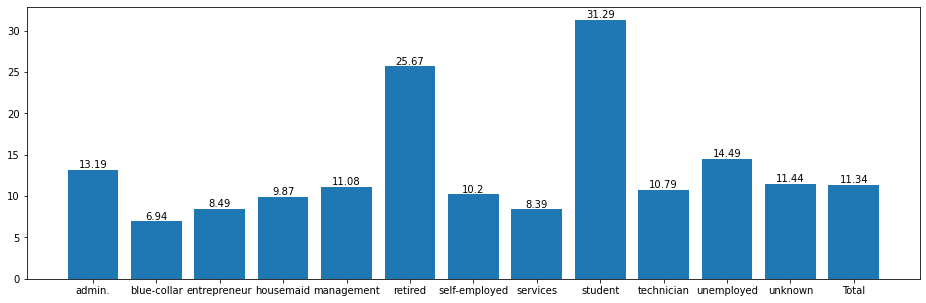

In [15]:
fig, ax = plt.subplots(figsize=(16,5))
bars = ax.bar(analysis_job.index, analysis_job['Percentage'])
for bar in bars:
    height = bar.get_height().round(2)
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f'{height}', ha='center',
    va='bottom')

#### INFERENCE- We have observed that the students and retired people have the highest success rates, so these are the ideal target market. Blue-collar having the lowest success should be focused on more.

____________________

# Task 2.2
## Exploratory Data Analysis

### Outlier analysis and treatment 

In [2]:
custDetails = pd.read_csv("Customer_and_bank details_p1.csv")
target = pd.read_csv("Customer_Response_data_P1.csv")
state = pd.read_csv("State_Master.csv")
region = pd.read_csv("Region_code_master.csv")
socio_economic = pd.read_csv("Customer_social_economic_data_p1.csv")

region['Region_Code'] = region['Region_Code'].astype(str)
state.drop('Region_Code', axis=1, inplace=True)

cust_outcome = pd.merge(custDetails, target, on='Customer_id', how='inner')
cust_outcome = pd.merge(cust_outcome, state, on='State_Code', how='inner')
cust_outcome = pd.merge(cust_outcome, region, on='Region_Code', how='inner')
cust_outcome = pd.merge(cust_outcome, socio_economic, on='Customer_id', how='inner')

cust_outcome.reset_index(drop=True, inplace=True)

In [21]:
cust_outcome.head()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,y,State_Name,Region_Name,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,56,services,married,high.school,no,no,yes,3,S1,C1,no,Kentucky,South,1.1,93.994,-36.4,4.857,5191.0
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,C1,no,Kentucky,South,1.1,93.994,-36.4,4.857,5191.0
2,419,52,admin.,married,basic.4y,no,yes,no,3,S1,C103,no,Kentucky,South,1.1,93.994,-36.4,4.857,5191.0
3,539,32,admin.,single,university.degree,no,no,no,3,S1,C1,no,Kentucky,South,1.1,93.994,-36.4,4.857,5191.0
4,540,36,services,married,high.school,no,no,no,3,S1,C1,no,Kentucky,South,1.1,93.994,-36.4,4.857,5191.0


In [22]:
cust_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37024 entries, 0 to 37023
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37024 non-null  int64  
 1   age             37024 non-null  int64  
 2   job             37024 non-null  object 
 3   marital         37024 non-null  object 
 4   education       37024 non-null  object 
 5   default         37024 non-null  object 
 6   housing         37024 non-null  object 
 7   loan            37024 non-null  object 
 8   Region_Code     37024 non-null  object 
 9   State_Code      37024 non-null  object 
 10  City_Code       37024 non-null  object 
 11  y               37024 non-null  object 
 12  State_Name      37024 non-null  object 
 13  Region_Name     37024 non-null  object 
 14  emp.var.rate    37024 non-null  float64
 15  cons.price.idx  37024 non-null  float64
 16  cons.conf.idx   37024 non-null  float64
 17  euribor3m       37024 non-null 

#### No null values

In [23]:
cust_outcome.describe()

,Customer_id,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000
mean,18546.444495,40.043593,0.082014,93.575909,-40.505396,3.621118,5167.027515
std,10704.860914,10.434720,1.569195,0.578436,4.622698,1.734113,72.217683
min,1.000000,17.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,9271.750000,32.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,18541.500000,38.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,27813.250000,47.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,37084.000000,98.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<AxesSubplot:xlabel='age'>

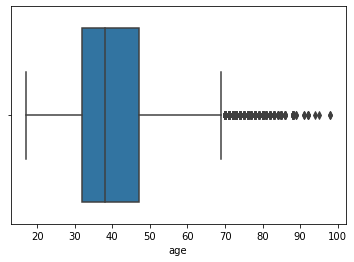

In [28]:
sns.boxplot(x='age', data=cust_outcome)

In [ ]:
# Create category for above 70

#### Most of the customers are within the ages 17 to 70 with the highest frequency being in the range of 32 to 47. A few customers are aged between 70 to 100. Since it's a well spread population, the outliers do not require treatment

<AxesSubplot:xlabel='emp.var.rate'>

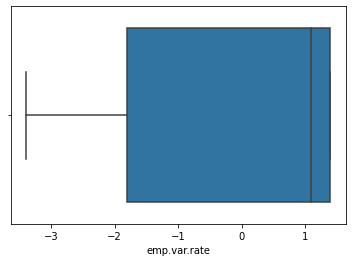

In [30]:
sns.boxplot(x='emp.var.rate', data=cust_outcome)

#### There are no outliers in employment variation rate 

<AxesSubplot:xlabel='cons.price.idx'>

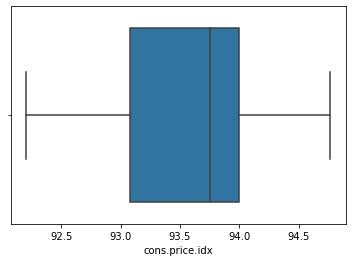

In [32]:
sns.boxplot(x='cons.price.idx', data=cust_outcome)

#### There are no outliers in consumer price index 

<AxesSubplot:xlabel='cons.conf.idx'>

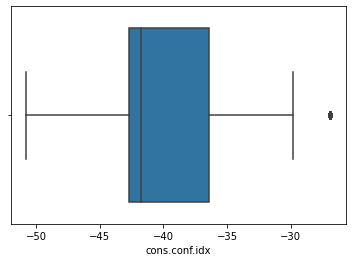

In [34]:
sns.boxplot(x='cons.conf.idx', data=cust_outcome)

There seems to be an outlier with data point much greater than the 95 percentile value.

<AxesSubplot:xlabel='cons.conf.idx'>

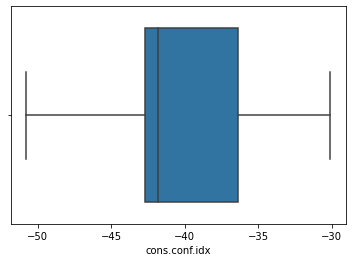

In [3]:
cust_outcome["cons.conf.idx"] = np.where(cust_outcome["cons.conf.idx"] > cust_outcome['cons.conf.idx'].quantile(0.975), 
                                         cust_outcome['cons.conf.idx'].quantile(0.975), cust_outcome['cons.conf.idx'])
sns.boxplot(x='cons.conf.idx', data=cust_outcome)

#### Outlier in consumer confidence index is treated

<AxesSubplot:xlabel='euribor3m'>

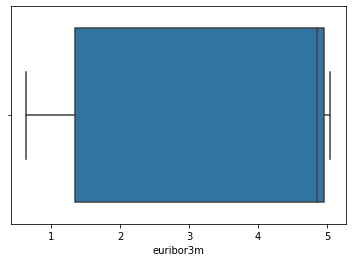

In [81]:
sns.boxplot(x='euribor3m', data=cust_outcome)

#### There are no outliers in euribor 3 month rate, but the data seems to be skewed rightward

<AxesSubplot:xlabel='nr.employed'>

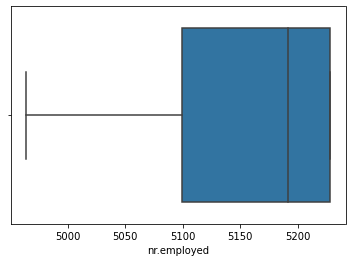

In [82]:
sns.boxplot(x='nr.employed', data=cust_outcome)

#### There are no outliers in number of employees, but the data seems to be skewed rightward


_____________________________


### Feature Engineering
Feature engineering is the process of using domain knowledge to select and transform the most relevant variables from the given data while creating a predictive model using machine learning. The goal of feature engineering and selection is to enhance the performance of machine learning algorithms.

In [14]:
custDetails = pd.read_csv("Customer_and_bank details_p1.csv")
target = pd.read_csv("Customer_Response_data_P1.csv")
socio_economic = pd.read_csv("Customer_social_economic_data_p1.csv")

cust_outcome = pd.merge(custDetails, target, on='Customer_id', how='inner')
cust_outcome = pd.merge(cust_outcome, socio_economic, on='Customer_id', how='inner')

cust_outcome.reset_index(drop=True, inplace=True)
cust_outcome.head()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,56,services,married,high.school,no,no,yes,3,S1,C1,no,1.1,93.994,-36.4,4.857,5191.0
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,C1,no,1.1,93.994,-36.4,4.857,5191.0
2,3,59,admin.,married,professional.course,no,no,no,4,S2,C2,no,1.1,93.994,-36.4,4.857,5191.0
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,C3,no,1.1,93.994,-36.4,4.857,5191.0
4,5,24,technician,single,professional.course,no,yes,no,3,S3,C3,no,1.1,93.994,-36.4,4.857,5191.0


From domain knowledge, we know that Customer_id is just a number assigned to each customer, having no statistical significance.

In [15]:
cust_outcome.drop('Customer_id', axis=1, inplace=True)
cust_outcome.head(3)

,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,services,married,high.school,no,no,yes,3,S1,C1,no,1.1,93.994,-36.4,4.857,5191.0
1,45,services,married,basic.9y,unknown,no,no,3,S1,C1,no,1.1,93.994,-36.4,4.857,5191.0
2,59,admin.,married,professional.course,no,no,no,4,S2,C2,no,1.1,93.994,-36.4,4.857,5191.0


In [110]:
cust_outcome['y'].unique()

array(['no', 'yes'], dtype=object)

We see that variable y is a binary variable with yes or no outcomes so we take the yes as 1 and no as 0.

In [16]:
cust_outcome = pd.get_dummies(cust_outcome, columns = ['y'], drop_first=True)
cust_outcome.head(3)

,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_yes
0,56,services,married,high.school,no,no,yes,3,S1,C1,1.1,93.994,-36.4,4.857,5191.0,0
1,45,services,married,basic.9y,unknown,no,no,3,S1,C1,1.1,93.994,-36.4,4.857,5191.0,0
2,59,admin.,married,professional.course,no,no,no,4,S2,C2,1.1,93.994,-36.4,4.857,5191.0,0


When building an ML model, we require the values to be numeric. So we analyze the categorical values and encode them.

In [72]:
cust_outcome['job'].unique()

array(['services', 'admin.', 'blue-collar', 'technician', 'housemaid',
       'retired', 'management', 'unknown', 'entrepreneur', 'unemployed',
       'student', 'self-employed'], dtype=object)

In [73]:
cust_outcome['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [74]:
cust_outcome['education'].unique()

array(['high.school', 'basic.9y', 'professional.course', 'unknown',
       'basic.4y', 'basic.6y', 'university.degree', 'illiterate'],
      dtype=object)

In [75]:
cust_outcome['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [76]:
cust_outcome['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [77]:
cust_outcome['loan'].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [127]:
cust_outcome['State_Code'].unique()[:5]

array(['S1', 'S2', 'S3', 'S4', 'S5'], dtype=object)

In [128]:
cust_outcome['City_Code'].unique()[:5]

array(['C1', 'C2', 'C3', 'C4', 'C5'], dtype=object)

Though Region_Code has numeric values, it refers to certain regions that are not ordinal. So we consider Region_Code as categorical variable too.

In [129]:
cust_outcome['Region_Code'].unique()

array(['3', '4', 'Na', '1', '2'], dtype=object)

In [130]:
cust_outcome.shape

(37084, 16)

For ease of interpretation, we drop unknown values.

In [17]:
cust_outcome.drop(cust_outcome[cust_outcome['Region_Code'] == 'Na'].index, inplace = True)
cust_outcome.drop(cust_outcome[cust_outcome['job'] == 'unknown'].index, inplace = True)
cust_outcome.drop(cust_outcome[cust_outcome['education'] == 'unknown'].index, inplace = True)
cust_outcome.drop(cust_outcome[cust_outcome['marital'] == 'unknown'].index, inplace = True)
cust_outcome.drop(cust_outcome[cust_outcome['default'] == 'unknown'].index, inplace = True)
cust_outcome.drop(cust_outcome[cust_outcome['housing'] == 'unknown'].index, inplace = True)
cust_outcome.drop(cust_outcome[cust_outcome['loan'] == 'unknown'].index, inplace = True)

In [7]:
print(cust_outcome['Region_Code'].unique(),
    cust_outcome['job'].unique(),
    cust_outcome['education'].unique(),
    cust_outcome['marital'].unique(),
    cust_outcome['default'].unique(),
    cust_outcome['housing'].unique(),
    cust_outcome['loan'].unique()
     )

['3' '4' '1' '2'] ['services' 'admin.' 'technician' 'blue-collar' 'retired' 'entrepreneur'
 'housemaid' 'management' 'unemployed' 'self-employed' 'student'] ['high.school' 'professional.course' 'basic.6y' 'basic.9y'
 'university.degree' 'basic.4y' 'illiterate'] ['married' 'single' 'divorced'] ['no' 'yes'] ['no' 'yes'] ['yes' 'no']


In [18]:
cust_outcome.reset_index(drop=True, inplace=True)
cust_outcome.shape

(27452, 16)

Now, for these we encode these categorical variables into binary numerics.
#### NOTE: We are only taking into account the region, to understand demographics of state and city.

In [19]:
cust_outcome = pd.get_dummies(cust_outcome, columns = 
                              ['job', 'education', 'marital', 'default', 'housing', 'loan'], 
                              drop_first=True)
cust_outcome.drop('Region_Code', axis=1, inplace=True)
cust_outcome.drop('State_Code', axis=1, inplace=True)
cust_outcome.drop('City_Code', axis=1, inplace=True)
cust_outcome.head(3)

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_yes,job_blue-collar,job_entrepreneur,job_housemaid,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,marital_married,marital_single,default_yes,housing_yes,loan_yes
0,56,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,59,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,24,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [20]:
cust_outcome.shape

(27452, 28)

In [21]:
cust_outcome.describe()

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_yes,job_blue-collar,job_entrepreneur,job_housemaid,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,marital_married,marital_single,default_yes,housing_yes,loan_yes
count,27452.000000,27452.000000,27452.000000,27452.000000,27452.00000,27452.000000,27452.000000,27452.000000,27452.000000,27452.000000,...,27452.000000,27452.000000,27452.000000,27452.000000,27452.000000,27452.000000,27452.000000,27452.000000,27452.000000,27452.000000
mean,39.060833,-0.068986,93.524229,-40.608466,3.46174,5160.884147,0.127167,0.185997,0.035517,0.022293,...,0.139808,0.252477,0.000328,0.141993,0.341287,0.574931,0.308903,0.000073,0.543093,0.156127
std,10.344671,1.607635,0.584535,4.778812,1.77654,75.100045,0.333166,0.389112,0.185085,0.147639,...,0.346794,0.434441,0.018104,0.349050,0.474150,0.494362,0.462049,0.008535,0.498149,0.362982
min,17.000000,-3.400000,92.201000,-50.800000,0.63400,4963.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,-1.800000,93.075000,-42.700000,1.31300,5099.100000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,1.100000,93.444000,-41.800000,4.85600,5191.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,45.250000,1.400000,93.994000,-36.400000,4.96100,5228.100000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,95.000000,1.400000,94.767000,-26.900000,5.04500,5228.100000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
cust_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27452 entries, 0 to 27451
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            27452 non-null  int64  
 1   emp.var.rate                   27452 non-null  float64
 2   cons.price.idx                 27452 non-null  float64
 3   cons.conf.idx                  27452 non-null  float64
 4   euribor3m                      27452 non-null  float64
 5   nr.employed                    27452 non-null  float64
 6   y_yes                          27452 non-null  uint8  
 7   job_blue-collar                27452 non-null  uint8  
 8   job_entrepreneur               27452 non-null  uint8  
 9   job_housemaid                  27452 non-null  uint8  
 10  job_management                 27452 non-null  uint8  
 11  job_retired                    27452 non-null  uint8  
 12  job_self-employed              27452 non-null 

C:\Users\KPARAS~1\AppData\Local\Temp/ipykernel_9604/1905581925.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


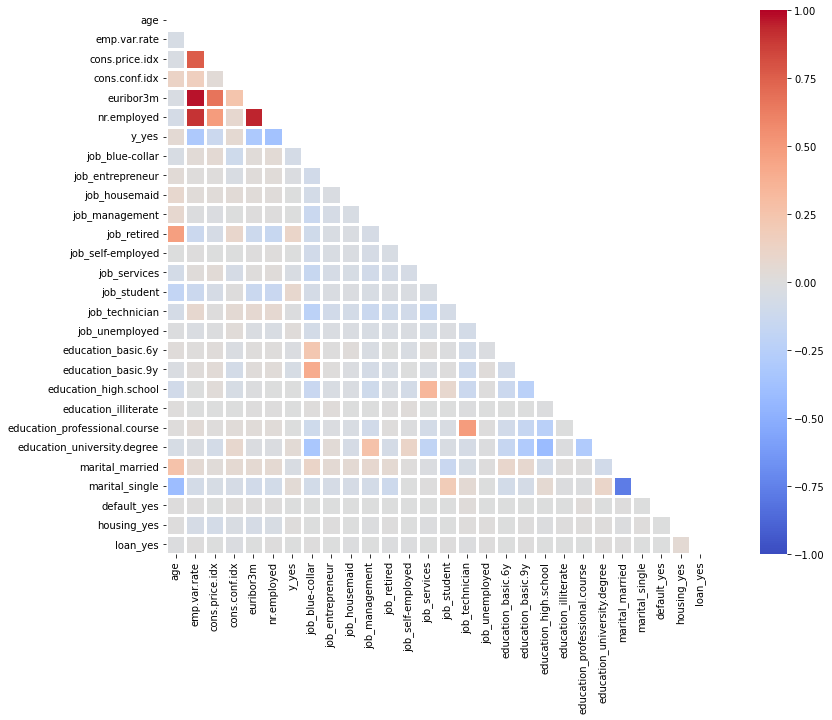

In [29]:
corr = cust_outcome.corr()
corr.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(18,10))

# fig.text(.34, .88, 'Numerical variable correlation', fontfamily='serif', fontweight='bold', fontsize=15)
# fig.text(1.00,.78, 'Observations', fontfamily='serif', fontweight='bold', fontsize=15)
# fig.text(.88, .68, 'Positive Correlations:', fontfamily='serif', fontweight='bold', fontsize=13)
# fig.text(.92, .65, 'Emp.Var.Rate vs. Euribor3M', fontfamily='serif', fontweight='light', fontsize=11)
# fig.text(.92, .62, 'Emp.Var.Rate vs. Nr.employed', fontfamily='serif', fontweight='light', fontsize=11)
# fig.text(.92, .59, 'Emp.Var.Rate vs. Cons.Price.Idx', fontfamily='serif', fontweight='light', fontsize=11)
# fig.text(.92, .56, 'Cons.Price.Idx vs. Euribor3M', fontfamily='serif', fontweight='light', fontsize=11)
# fig.text(.92, .53, 'Cons.Price.Idx vs. Nr.employed', fontfamily='serif', fontweight='light', fontsize=11)



pl = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0, square=True, linewidths=2.5)
plt.show()